In [111]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [136]:
X,y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=5,
    random_state=3,
    shuffle=True
    
)

In [137]:
#print(y)

In [138]:
X.shape,y.shape

((500, 2), (500,))

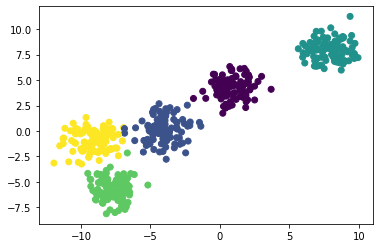

In [139]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

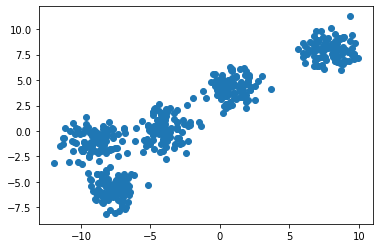

In [140]:
# K Means
plt.scatter(X[:,0],X[:,1])
plt.show()

In [141]:
import numpy as np

In [142]:
k = 5

color = ["red","blue","green","orange","yellow"]

#Randomly Assign Clusters 
clusters = {}
for i in range(k):
    center = 20*(np.random.random((2,))-0.5)
        
    clusters[i] = {
        'center':center,
        'points':[],
        'color':color[i]
    }
         

In [143]:
clusters

{0: {'center': array([-4.39939453,  4.49179624]),
  'points': [],
  'color': 'red'},
 1: {'center': array([-1.13445604,  3.33830783]),
  'points': [],
  'color': 'blue'},
 2: {'center': array([-2.53267954,  3.32959575]),
  'points': [],
  'color': 'green'},
 3: {'center': array([-9.86086962, -2.43619793]),
  'points': [],
  'color': 'orange'},
 4: {'center': array([-2.67295614, -6.63547096]),
  'points': [],
  'color': 'yellow'}}

In [144]:
clusters[0]['center'][0]

-4.399394530790836

In [145]:
def distance(a,b):
    return np.sqrt(np.sum((a-b)**2))
    
def assignPtsToClusters(clusters,X):
    m =X.shape[0]
    
    #Points
    for ix in range(m):
        dist = []
        for kx in range(k):
            d = distance(X[ix],clusters[kx]['center'])
            dist.append(d)
            
        cluster_idx = np.argmin(dist)
        clusters[cluster_idx]['points'].append(X[ix])
        

def updateClusterCenters(clusters):
    
    #Iterate over every cluster k
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0:
            new_coordinates = np.mean(pts,axis=0)
            clusters[kx]['center'] = new_coordinates
            clusters[kx]['points'] = []
            

In [146]:
def plotClusters(clusters):
    #plt.scatter(X[:,0],X[:,1])
    for i in range(k):
        pts = np.array(clusters[i]['points'])
        if pts.shape[0]>0:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[i]['color'])
        plt.scatter(clusters[i]['center'][0],clusters[i]['center'][1],marker='*',color='black')
        
    plt.show()
        
        

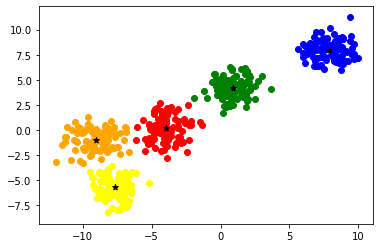

In [155]:
assignPtsToClusters(clusters,X)
plotClusters(clusters)
updateClusterCenters(clusters)


## Sklearn - K-Means 

In [161]:
from sklearn.cluster import KMeans

In [163]:
kmeans = KMeans(n_clusters=5)

In [164]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [167]:
centers = kmeans.cluster_centers_

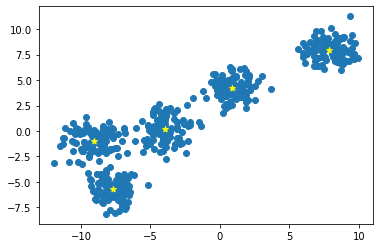

In [173]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(centers[:,0],centers[:,1],marker='*',color='yellow')
plt.show()

## Dot Product vs Element Wise Product

In [157]:
a = np.mat([1,2,3])
a*a.T

matrix([[14]])

In [158]:
a = np.array([1,2,3])
a*a

array([1, 4, 9])

In [159]:
a = np.array([1,2,3])
np.dot(a,a.T)

14